# Week 10 Lab: K-means Clustering

This week we move on from supervised learning and on to unsupervised learning. Recall, this is when we do not have labels associated with our data. Instead of predicting labels, we are instead interested in lumping together data points which are 'most similar' so that, if desired, we can asign labels to data points. For example, we might have spatial data points and want to put all points less than $\epsilon$ distance away from a given point in one cluster, all points less than $\epsilon$ distance away from another point in a second cluster, and so on. In this way, we can end up with $n$ clusters and this could allow us, if we so chose, to asign labels $0,\ldots,n$ to our data points ($0$ to the data in the first cluster, $1$ to the data in the second cluster, and so on). 

As ever, the usual references have been used including _Introduction to Data Mining_, McKinney's _Python for Data Analysis_ and Jose Portilla. Read the step-by-step instructions below carefully. To execute the code, click on the corresponding cell and press the SHIFT-ENTER keys simultaneously.


## 10.1 Data Creation

For this lab we will create our own data instead of working with a data set. This is quite often useful when we want to practice.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import make_blobs

data1 = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=1.8,random_state=101)
data2 = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.8,random_state=101)

Note that this is actually producing a tuple (or 2 tuples since we ran it twice) and the first component is a NumPy array with the defined number of samples and number of columns equal to the defined number of features. What `make_blobs` is doing is choosing this random data in a way that it naturally forms _n_ clusters (where _n_ is whatever we set `centers` to) which vary around the defined centres according to `cluster_std`.

The second component of this tuple is another array which contains the information on which cluster that given point belongs to. try running `data1[1]` to see this.

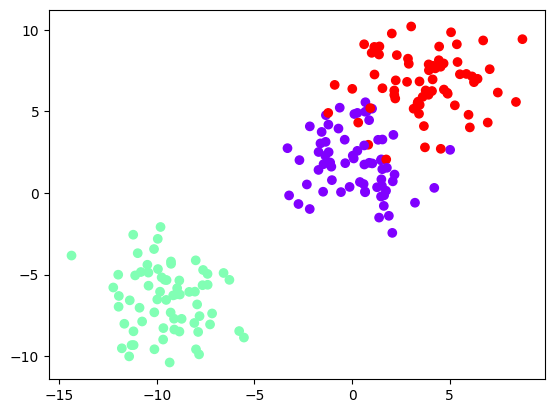

In [3]:
plt.scatter(data1[0][:,0],data1[0][:,1],c=data1[1],cmap='rainbow')

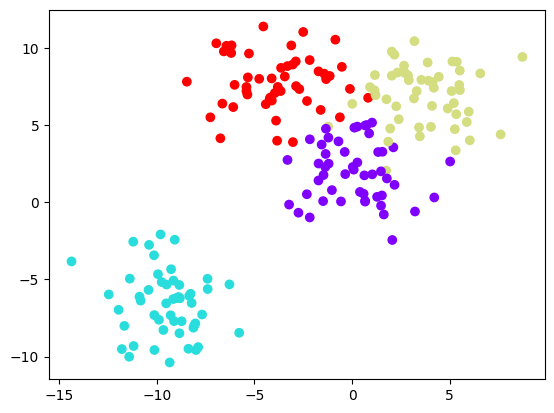

In [4]:
plt.scatter(data2[0][:,0],data2[0][:,1],c=data2[1],cmap='rainbow')

# 10.2 Creating Clusters (data1)

Now that we have two datasets to work with we will start making clusters. We will do this for both of the datasets, one in this section and one in the next.

First, we note that as we have created our data, we know how many clusters there are. In the real world, this would not be the case and so we would have to discover how many clusters exist. We will see how to do this in Section 10.4.

In [5]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)

In [6]:
kmeans.fit(data1[0])

KMeans(n_clusters=3)

In [7]:
kmeans.cluster_centers_

array([[-9.47785082, -6.50347007],
       [ 0.19523375,  2.06032279],
       [ 4.05372522,  6.93012372]])

In [8]:
kmeans.labels_

array([1, 0, 1, 1, 0, 1, 2, 1, 0, 1, 2, 1, 1, 2, 2, 1, 0, 1, 0, 0, 2, 0,
       0, 2, 0, 1, 1, 0, 0, 2, 1, 1, 1, 0, 0, 2, 2, 2, 0, 2, 0, 0, 1, 0,
       2, 1, 1, 2, 1, 2, 0, 1, 0, 2, 2, 1, 2, 2, 1, 0, 0, 0, 0, 0, 1, 0,
       2, 0, 0, 0, 1, 0, 1, 1, 2, 0, 2, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 2, 1, 0, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 0, 2, 0, 0, 1, 2,
       2, 0, 0, 2, 2, 2, 2, 1, 2, 1, 0, 1, 0, 2, 1, 1, 2, 2, 2, 2, 1, 0,
       0, 2, 0, 2, 0, 1, 0, 0, 0, 2, 2, 0, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 0, 2,
       0, 0, 2, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 2, 2, 0, 1, 0, 0, 0, 1,
       1, 1])

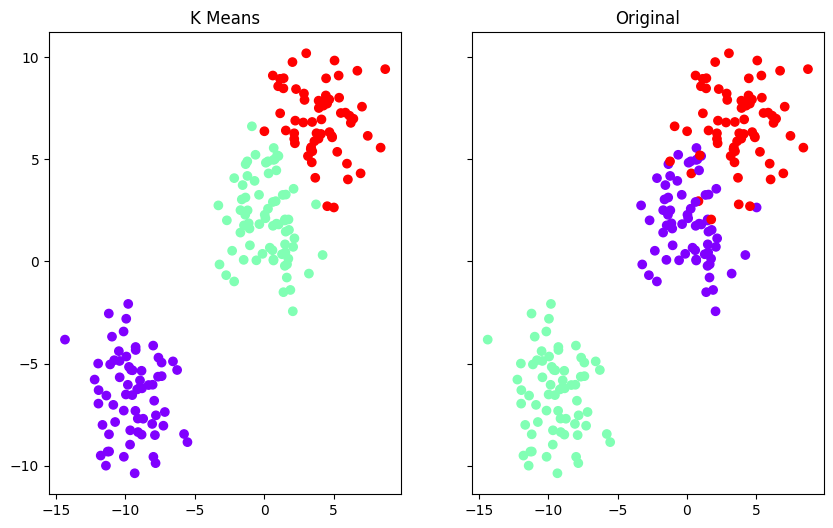

In [9]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))

ax1.set_title('K Means')
ax1.scatter(data1[0][:,0],data1[0][:,1],c=kmeans.labels_,cmap='rainbow')

ax2.set_title("Original")
ax2.scatter(data1[0][:,0],data1[0][:,1],c=data1[1],cmap='rainbow')

We note the bottom left cluster is right, and the top two clusters are also reasonably well assigned (ignore the different colours, that doesn't mean anything). The only places where we see a few errors is in the noisy region where the two clusters intersect, but this is minimal.

## 10.3 Creating Clusters (data2)

In [10]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(data2[0])

KMeans(n_clusters=4)

In [11]:
kmeans.cluster_centers_

array([[ 3.71749226,  7.01388735],
       [-9.46941837, -6.56081545],
       [-4.13591321,  7.95389851],
       [-0.0123077 ,  2.13407664]])

In [12]:
kmeans.labels_

array([2, 0, 3, 0, 0, 1, 0, 3, 0, 3, 2, 3, 0, 0, 2, 3, 0, 3, 1, 2, 1, 3,
       3, 1, 2, 1, 1, 3, 0, 0, 2, 1, 0, 3, 3, 2, 1, 1, 1, 3, 1, 2, 2, 2,
       3, 0, 2, 3, 1, 3, 3, 2, 0, 3, 1, 2, 3, 3, 2, 0, 1, 0, 1, 2, 0, 3,
       1, 0, 0, 1, 0, 3, 1, 3, 1, 0, 0, 3, 2, 3, 3, 1, 0, 1, 3, 3, 3, 2,
       3, 1, 1, 1, 1, 3, 3, 1, 0, 2, 1, 0, 3, 1, 3, 3, 0, 3, 1, 0, 1, 1,
       0, 2, 2, 0, 1, 0, 2, 2, 0, 2, 3, 2, 3, 2, 3, 0, 2, 3, 1, 2, 2, 2,
       3, 1, 1, 2, 0, 2, 0, 3, 1, 0, 1, 2, 2, 0, 3, 1, 2, 2, 2, 2, 3, 0,
       3, 2, 0, 0, 0, 3, 0, 3, 3, 2, 1, 2, 3, 0, 2, 3, 0, 3, 2, 0, 3, 2,
       0, 0, 1, 0, 2, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 0, 0, 2, 1, 3, 0, 0,
       1, 3])

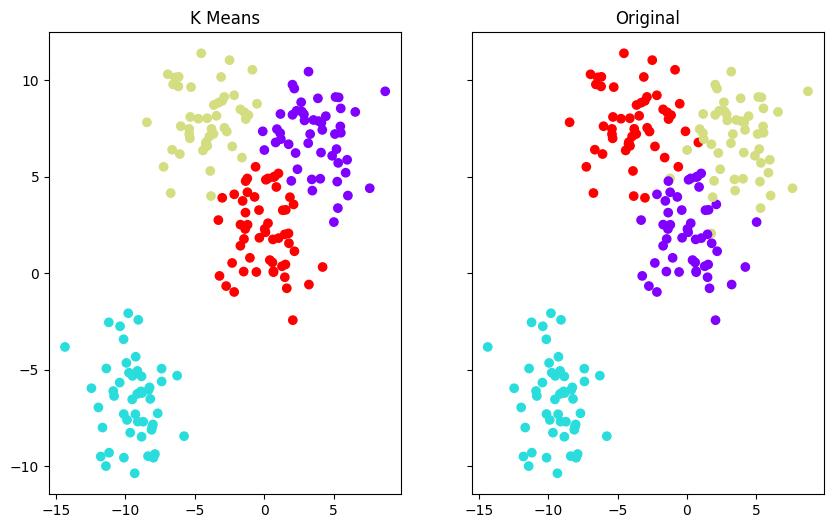

In [13]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))

ax1.set_title('K Means')
ax1.scatter(data2[0][:,0],data2[0][:,1],c=kmeans.labels_,cmap='rainbow')

ax2.set_title("Original")
ax2.scatter(data2[0][:,0],data2[0][:,1],c=data2[1],cmap='rainbow')

Again, similar to previous case, we get a few errors in the noisy regions of intersection, but for the most part the clusters have correctly assigned the data points.

## 10.4 Determining the Number of Clusters

Hopefully we are now happy with how to create clusters. Next, we need to decide on how many clusters to form. For example, suppose we take `data2` above and assume there are 3 clusters instead.

In [14]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data2[0])

KMeans(n_clusters=3)

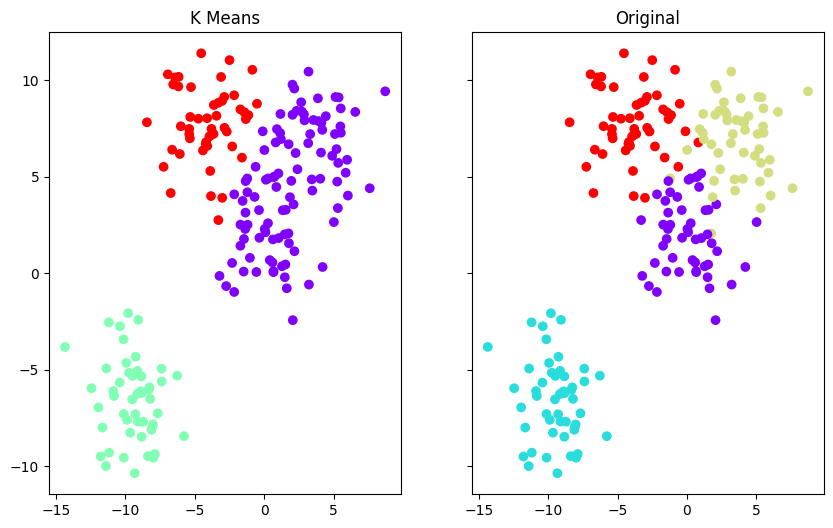

In [15]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))

ax1.set_title('K Means')
ax1.scatter(data2[0][:,0],data2[0][:,1],c=kmeans.labels_,cmap='rainbow')

ax2.set_title("Original")
ax2.scatter(data2[0][:,0],data2[0][:,1],c=data2[1],cmap='rainbow')

What about 2?

In [16]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data2[0])

KMeans(n_clusters=2)

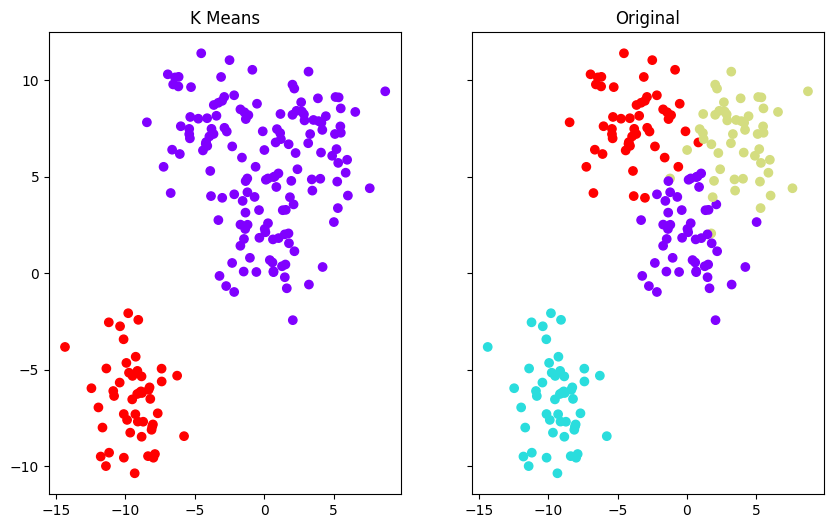

In [17]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))

ax1.set_title('K Means')
ax1.scatter(data2[0][:,0],data2[0][:,1],c=kmeans.labels_,cmap='rainbow')

ax2.set_title("Original")
ax2.scatter(data2[0][:,0],data2[0][:,1],c=data2[1],cmap='rainbow')

Or 5?

In [18]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(data2[0])

KMeans(n_clusters=5)

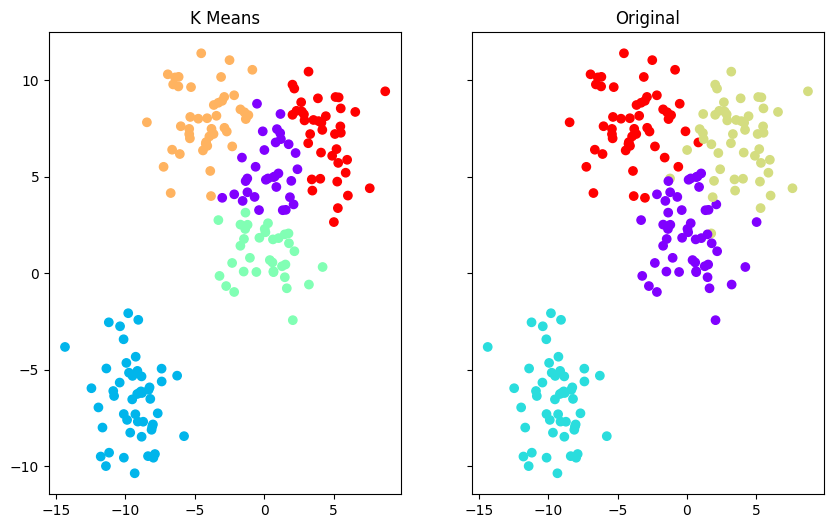

In [19]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))

ax1.set_title('K Means')
ax1.scatter(data2[0][:,0],data2[0][:,1],c=kmeans.labels_,cmap='rainbow')

ax2.set_title("Original")
ax2.scatter(data2[0][:,0],data2[0][:,1],c=data2[1],cmap='rainbow')

One method to address this is known as the 'elbow' method. The idea is that we assume different numbers of clusters, compute their corresponding sum-of-squared errors (SSE) and plot this against number of clusters. What we will see in general is that as the clusters increase from 1 onwards there will be a quick decrease in SSE. However, after a while (could be very soon), the SSE plot will level off as we see diminishing returns, or even worse performance. The effect is a plot that looks vaguely like an arm, bent at the elbow.

Text(0, 0.5, 'SSE')

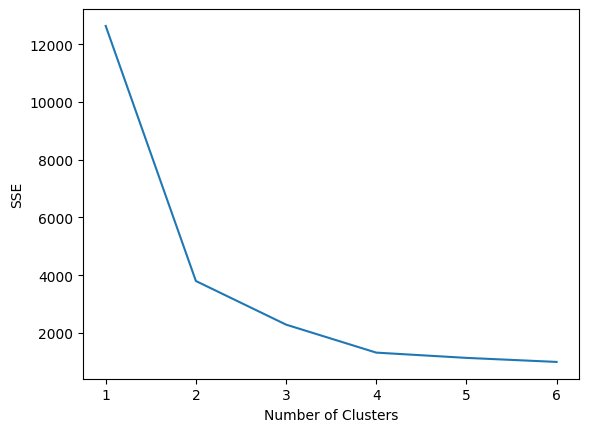

In [20]:
numClusters = [1,2,3,4,5,6]
SSE = []
for k in numClusters:
    k_means = KMeans(n_clusters=k)
    k_means.fit(data2[0])
    SSE.append(k_means.inertia_)

plt.plot(numClusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

Note that after 4 clusters, the SSE does not decrease that much. This fits in with what we know of our data.

## 10.5 The California Housing Data

To finish off this lab, let's return to the California Housing Data and perform some K-means clustering. We will use location data (longitude and latitude) as well as the median house value to cluster the houses by location.

In [21]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing(as_frame=True)
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [22]:
housing.frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


For this task, we only want to use location data and the median house value. As such, we drop the rest.

In [23]:
housing.frame.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [24]:
home_data = housing.frame.drop(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup'],axis=1)

In [25]:
home_data.head()

,Latitude,Longitude,MedHouseVal
0,37.88,-122.23,4.526
1,37.86,-122.22,3.585
2,37.85,-122.24,3.521
3,37.85,-122.25,3.413
4,37.85,-122.25,3.422


<Axes: xlabel='Longitude', ylabel='Latitude'>

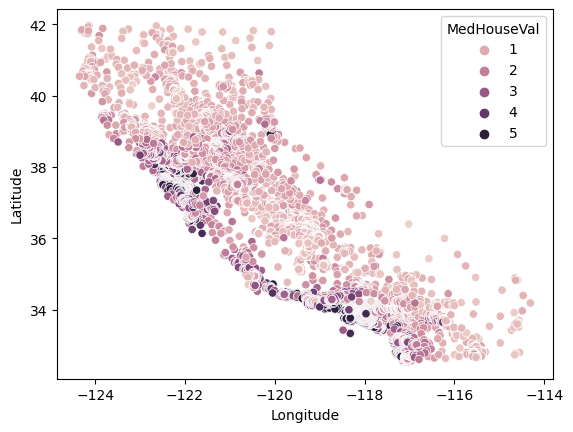

In [26]:
import seaborn as sns

sns.scatterplot(data = home_data, x = 'Longitude', y = 'Latitude', hue = 'MedHouseVal')

Recall, the above. We saw how the most expensive houses were on the west coast of California, along with areas that have clusters of moderately priced houses.

When working with distance-based algorithms like k-Means Clustering, we must normalize the data. If we don't, then variables with different scaling will be weighted differently in the distance formula that is being optimized during training. For example, if we were to include price in the cluster, in addition to latitude and longitude, price would have an outsized impact on the optimizations because its scale is significantly larger and wider than the bounded location variables. 

In [27]:
# Set up training and test splits
# We don't have to do this here, really. If we wanted to use the clusters as a feature in a supervised learning model
# or for prediction, then we would. For K-means, this is not the norm but we do it here anyway to make the point
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(home_data[['Latitude', 'Longitude']], 
                                                    home_data[['MedHouseVal']], 
                                                    test_size=0.33, random_state=101)

In [28]:
# Normalise
from sklearn import preprocessing

X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

Text(0, 0.5, 'SSE')

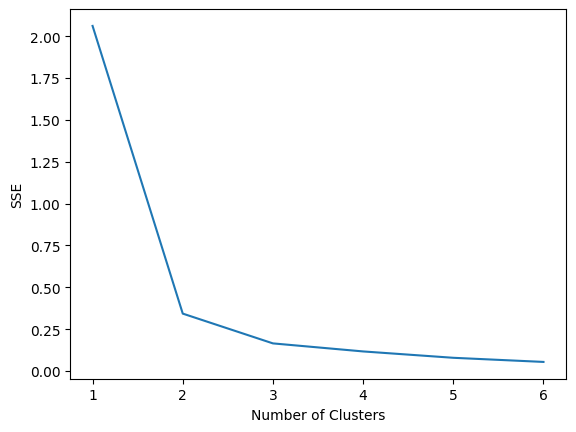

In [29]:
# Decide upon number of clusters
numClusters = [1,2,3,4,5,6]
SSE = []
for k in numClusters:
    k_means = KMeans(n_clusters=k, random_state = 0,)
    k_means.fit(X_train_norm)
    SSE.append(k_means.inertia_)

plt.plot(numClusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

In [30]:
# Fit the model with k=3
kmeans = KMeans(n_clusters = 3, random_state = 0)
kmeans.fit(X_train_norm)

KMeans(n_clusters=3, random_state=0)

<Axes: xlabel='Longitude', ylabel='Latitude'>

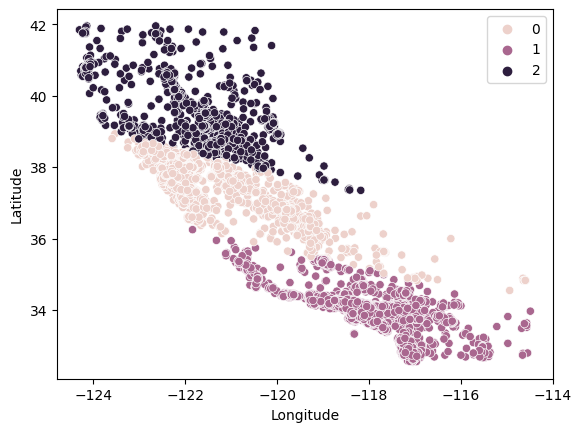

In [31]:
sns.scatterplot(data = X_train, x = 'Longitude', y = 'Latitude', hue = kmeans.labels_)

We see that the data is split into three distinct groups: Northern California, Central California and Southern California).

We can use a boxplot to look at the distribution of median house prices.

<Axes: ylabel='MedHouseVal'>

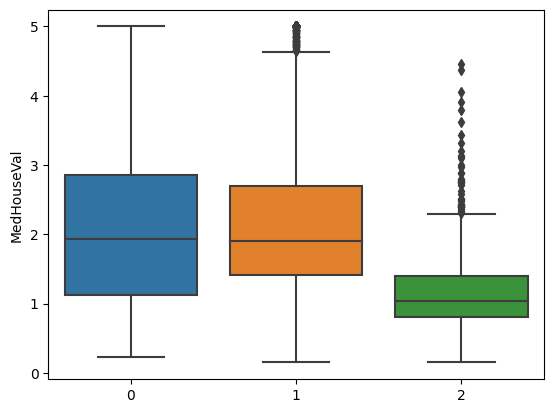

In [32]:
sns.boxplot(x = kmeans.labels_, y = y_train['MedHouseVal'])

We can evaluate the performance of our algorithm using a Silhouette score. This metric ranges from -1 to 1 and calculates the 'goodness' of a clustering technique. Here, 1 means clusters are well apart from each other and clearly distinguished, 0 means  the distance between clusters is not significant, while -1 means the clusters are assigned in the wrong way.

In [33]:
from sklearn.metrics import silhouette_score

silhouette_score(X_train_norm, kmeans.labels_, metric='euclidean')

0.7493539024283632

We can see that our clusters are reasonably distinguished.

## 10.6 Exercise Problem

For this problem we will use the _College_Data_ file to cluster universities into two groups: public and private. This is a case where we actually have the labels so will be able to create a classification report at the end to udge how well we did with our clustering.

The data will consist of 777 observations with 18 variables which are as follows:

* Private A factor with levels No and Yes indicating private or public university
* Apps Number of applications received
* Accept Number of applications accepted
* Enroll Number of new students enrolled
* Top10perc Pct. new students from top 10% of H.S. class
* Top25perc Pct. new students from top 25% of H.S. class
* F.Undergrad Number of fulltime undergraduates
* P.Undergrad Number of parttime undergraduates
* Outstate Out-of-state tuition
* Room.Board Room and board costs
* Books Estimated book costs
* Personal Estimated personal spending
* PhD Pct. of faculty with Ph.D.’s
* Terminal Pct. of faculty with terminal degree
* S.F.Ratio Student/faculty ratio
* perc.alumni Pct. alumni who donate
* Expend Instructional expenditure per student
* Grad.Rate Graduation rate

Tackle the following problems:
1. Import the data as a csv and perform the usual summary analysis.
2. Create a scatterplot of Grad.rate versus Room.Board, where the points are coloured by the Private column.
3. Create a scatterplot of F.Undergrad versus Outstate, where the points are coloured by the Private column.
4. Create a stacked histogram showing Out of State Tuition based on the Private column, ideally using sns.FacetGrid.
5. Similar to part (4), create a histogram for the Grad.Rate column.
6. There seems to be a private school with a graduation rate of higher than 100%. What is the name of that school? Set this school's graduation rate to 100 so it makes sense.
7. Set up your clusters with k=2.
8. What are the cluster centre vectors?
9. Evaluate your clustering algorithm (recall, we usually can't do this in real life) and create a confusion matrix and classification report. How well has the K-means clustering performed?
10. Bonus: what happens if you increase the number of clusters?

## 10.7 Summary

We should now be able to successfully implement the K-means algorithm to a dataset. Once again, please keep in mind that in the above we often used the fact that we knew the labels beforehand. This meant we could evaluate the effectiveness of our algorithm but in the real world we are unlikely to have such labels.